<a href="https://colab.research.google.com/github/ErnestGeo24/Verifica_pandas_geopandas_flask/blob/main/Geopandas_sjoin_merge_Groupby_to_crs_cmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
incidenti = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/incidenti.zip')
incidenti

id  numero    anno       coordx        coordy           fumetto  \
0     NaN   414.0  2018.0  664215.2690  5.104593e+06  anno 2018 n. 414   
1     NaN   401.0  2018.0  664077.7677  5.103391e+06  anno 2018 n. 401   
2     NaN   384.0  2018.0  664122.6038  5.106284e+06  anno 2018 n. 384   
3     NaN   385.0  2018.0  662871.0950  5.107867e+06  anno 2018 n. 385   
4     NaN   386.0  2018.0  664290.0823  5.100498e+06  anno 2018 n. 386   
...    ..     ...     ...          ...           ...               ...   
16913 NaN   591.0  2020.0  663403.3435  5.105367e+06  anno 2020 n. 591   
16914 NaN   592.0  2020.0  663628.6588  5.103999e+06  anno 2020 n. 592   
16915 NaN   593.0  2020.0  663866.8926  5.104791e+06  anno 2020 n. 593   
16916 NaN   594.0  2020.0  663735.7042  5.104159e+06  anno 2020 n. 594   
16917 NaN   595.0  2020.0  658185.7714  5.104717e+06  anno 2020 n. 595   

           x_gps      y_gps                        geometry  
0      11.123654  46.075180  POINT (664215.269 5104592.978)  
1      11.121463  46.064400  POINT (664077.768 5103390.726)  
2      11.123040  46.090408  POINT (664122.604 5106283.608)  
3      11.107405  46.104950  POINT (662871.095 5107867.145)  
4      11.123209  46.038328  POINT (664290.082 5100497.659)  
...          ...        ...                             ...  
16913  11.113428  46.082339  POINT (663403.344 5105367.331)  
16914  11.115870  46.069982  POINT (663628.659 5103999.465)  
16915  11.119221  46.077044  POINT (663866.893 5104790.982)  
16916  11.117308  46.071392  POINT (663735.704 5104159.078)  
16917  11.045773  46.077718  POINT (658185.771 5104717.054)  

[16918 rows x 9 columns]

In [ ]:
incidenti.plot(markersize=0.1, color = 'red')

In [ ]:
!pip install contextily

In [ ]:
import contextily as ctx

In [ ]:
incidenti3857 = incidenti.to_crs(3857)

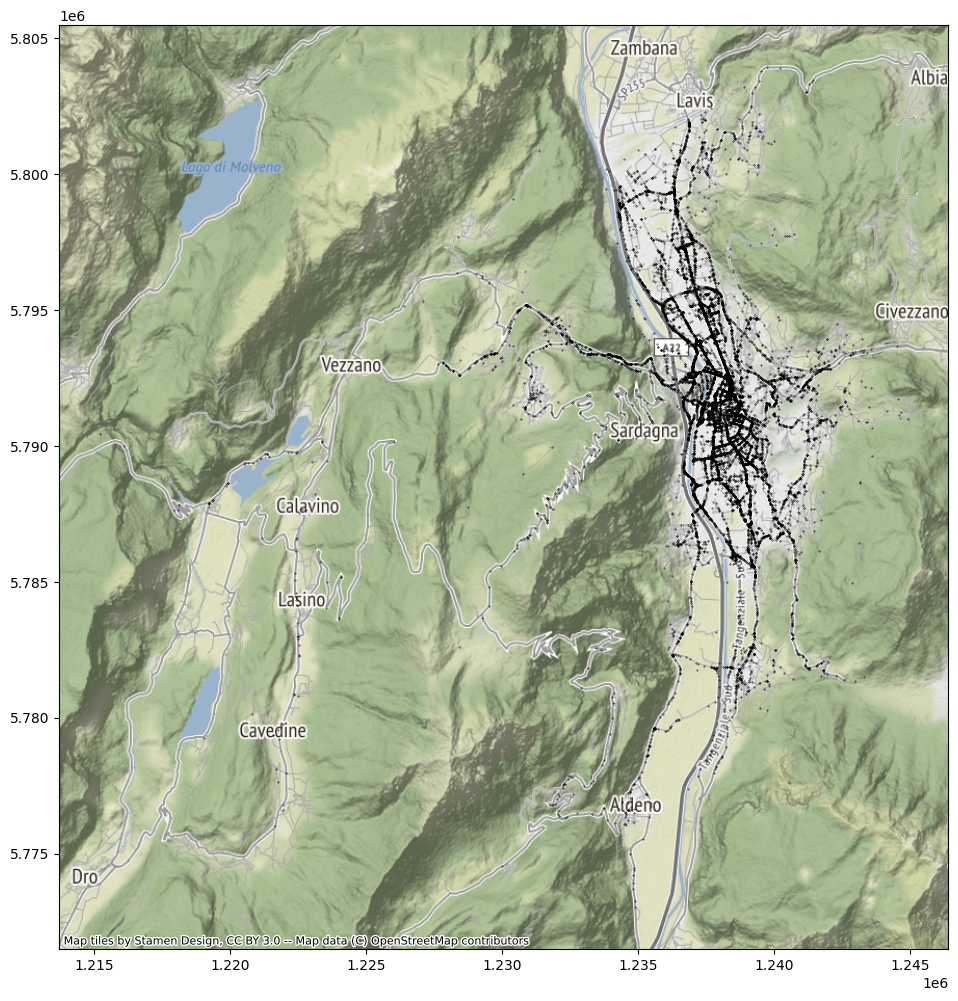

In [ ]:
ax = incidenti3857.plot(figsize = (12,12), markersize = 0.1, color = 'black')
ctx.add_basemap(ax)

In [ ]:
comuni = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Com01012022_g')
comuni

In [ ]:
comuni25832 = comuni.to_crs(25832)

In [ ]:
comuniIncidenti = comuni25832[comuni25832.intersects(incidenti.unary_union)]
comuniIncidenti

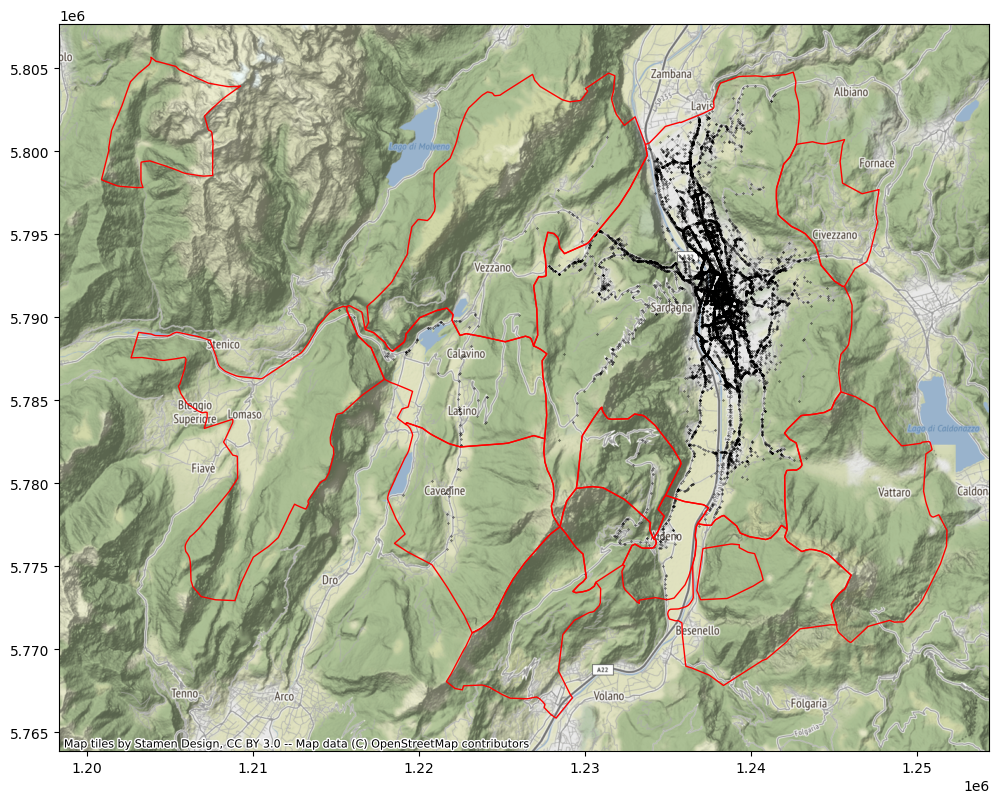

In [ ]:
ax = incidenti.to_crs(3857).plot(figsize=(12,12),markersize=0.1,color='black')
comuniIncidenti.to_crs(3857).plot(ax=ax,facecolor='None',edgecolor='red')
ctx.add_basemap(ax)

In [ ]:
join = gpd.sjoin(incidenti,comuniIncidenti,predicate ='intersects',how = 'left')
join

In [55]:
incidentiPerComune = join.groupby('COMUNE').count()['numero'].reset_index()
incidentiPerComune

COMUNE  numero
0                     Aldeno      58
1   Altopiano della Vigolana       1
2                  Besenello       1
3                   Cavedine      16
4                     Cimone      32
5                  Civezzano       1
6               Comano Terme       1
7              Garniga Terme      12
8                   Madruzzo      57
9                     Trento   16671
10                Vallelaghi      35
11            Villa Lagarina       1

In [57]:
comuniIncidenti = comuniIncidenti.merge(incidentiPerComune, on = 'COMUNE')
comuniIncidenti

COD_RIP  COD_REG  COD_PROV  COD_CM  COD_UTS  PRO_COM PRO_COM_T  \
0         2        4        22       0       22    22003    022003   
1         2        4        22       0       22    22013    022013   
2         2        4        22       0       22    22053    022053   
3         2        4        22       0       22    22058    022058   
4         2        4        22       0       22    22061    022061   
5         2        4        22       0       22    22091    022091   
6         2        4        22       0       22    22205    022205   
7         2        4        22       0       22    22222    022222   
8         2        4        22       0       22    22228    022228   
9         2        4        22       0       22    22236    022236   
10        2        4        22       0       22    22243    022243   
11        2        4        22       0       22    22248    022248   

                      COMUNE COMUNE_A  CC_UTS    Shape_Leng    Shape_Area  \
0                     Aldeno      NaN       0  14067.700841  9.035749e+06   
1                  Besenello      NaN       0  33753.006052  2.646670e+07   
2                   Cavedine      NaN       0  26678.921071  3.777352e+07   
3                     Cimone      NaN       0  14187.001165  9.919348e+06   
4                  Civezzano      NaN       0  17479.012969  1.563954e+07   
5              Garniga Terme      NaN       0  16219.888799  1.311427e+07   
6                     Trento      NaN       1  69873.254406  1.575544e+08   
7             Villa Lagarina      NaN       0  25011.435797  2.403284e+07   
8               Comano Terme      NaN       0  65444.236579  6.778564e+07   
9   Altopiano della Vigolana      NaN       0  31064.325488  4.487673e+07   
10                  Madruzzo      NaN       0  27776.459945  2.919389e+07   
11                Vallelaghi      NaN       0  44407.685332  7.232422e+07   

                                             geometry  numero  
0   POLYGON ((662867.794 5095190.238, 663668.722 5...      58  
1   POLYGON ((665089.798 5094223.836, 665246.608 5...       1  
2   POLYGON ((651143.727 5098185.474, 651809.507 5...      16  
3   POLYGON ((659003.463 5095713.344, 659439.862 5...      32  
4   POLYGON ((669145.854 5110394.064, 669118.294 5...       1  
5   POLYGON ((659718.268 5098543.950, 660423.699 5...      12  
6   POLYGON ((667067.723 5112818.226, 667043.104 5...   16671  
7   POLYGON ((657954.972 5093700.591, 658111.547 5...       1  
8   MULTIPOLYGON (((648398.604 5102980.665, 648436...       1  
9   POLYGON ((669307.456 5099945.778, 669941.870 5...       1  
10  POLYGON ((652980.168 5102740.430, 652944.909 5...      57  
11  POLYGON ((659229.461 5112978.629, 659492.832 5...      35

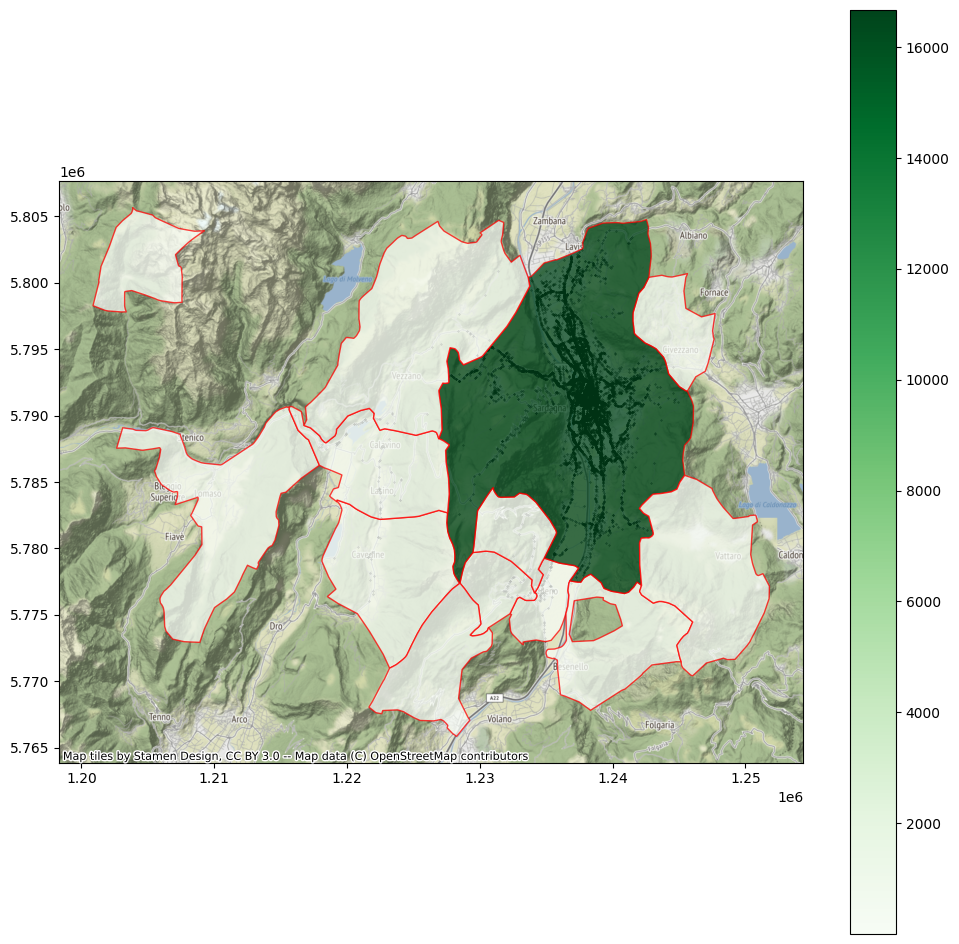

In [61]:
ax = incidenti.to_crs(3857).plot(figsize=(12,12),markersize=0.1,color='black')
comuniIncidenti.to_crs(3857).plot(ax=ax,column = 'numero',cmap ='Greens',edgecolor='red',alpha=0.75,legend = True)
ctx.add_basemap(ax)